In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)


In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_data = pd.read_csv(file_name)

In [20]:
boston_data.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [22]:
boston_data.columns


# 2. **CRIM**: Per capita crime rate by town.

# 3. **ZN**: Proportion of residential land zoned for large lots (over 25,000 sq.ft.).

# 4. **INDUS**: Proportion of non-retail business acres per town.

# 5. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

# 6. **NOX**: Nitric oxides concentration (parts per 10 million).

# 7. **RM**: Average number of rooms per dwelling.

# 8. **AGE**: Proportion of owner-occupied units built prior to 1940.

# 9. **DIS**: Weighted distances to five Boston employment centers.

# 10. **RAD**: Index of accessibility to radial highways.

# 11. **TAX**: Full-value property tax rate per $10,000.

# 12. **PTRATIO**: Pupil-teacher ratio by town.

# 13. **LSTAT**: Percentage of lower status of the population.

# 14. **MEDV**: Median value of owner-occupied homes in $1000s.



Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

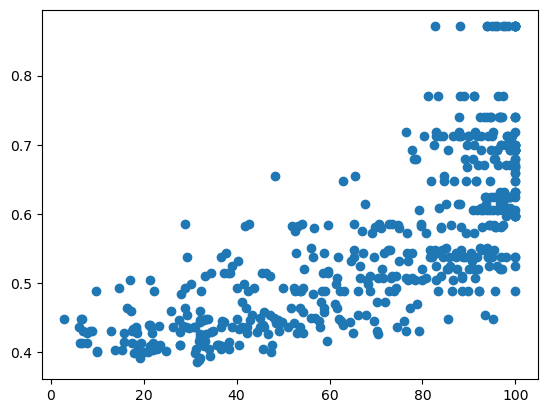

In [42]:


plt.scatter(boston_data['AGE'],boston_data['NOX'])




In [3]:
lr=LinearRegression()

In [4]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)#indicates that the operation should be performed along columns.
y = boston_data[y_col]


In [14]:
pf = PolynomialFeatures(degree=2, include_bias=False)

X_pf = pf.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [17]:
s=StandardScaler()
X_train_s = s.fit_transform(X_train)

In [46]:
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)


In [47]:
r2_score(y_test,y_pred)

0.8870572380964042

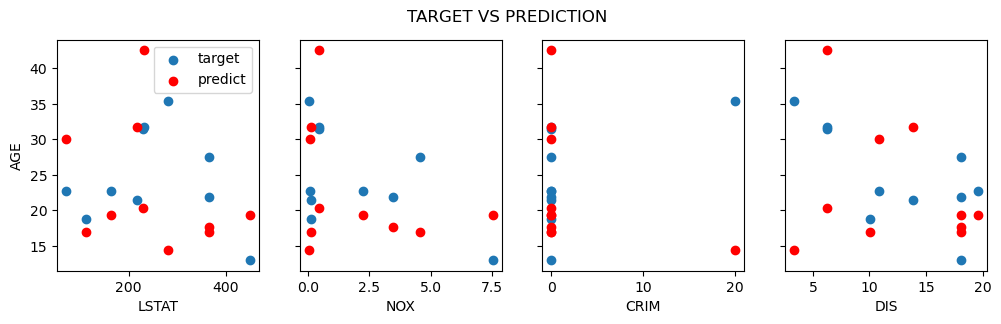

In [49]:
# plot predictions and targets vs original features    
X_features=['LSTAT','NOX','CRIM','DIS']
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:10,i],y_train[:10], label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:10,i],y_pred[:10],color='r', label = 'predict')
ax[0].set_ylabel("AGE")
ax[0].legend()
fig.suptitle("TARGET VS PREDICTION")
plt.show()